# Simple Linear Regression and Statistical Computing Skills with Python #

## 1. Linear Regression ##
Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It predicts the value of the dependent variable based on the values of the independent variable(s).



## 2. Difference Between Simple and Multivariate Linear Regression ##
Simple Linear Regression: Involves one independent variable and one dependent variable. The relationship between these variables is represented by a straight line.

Multivariate Linear Regression: Involves more than one independent variable and one dependent variable. This model tries to predict a dependent variable based on several independent variables.

## 3. Formulate a Question for Simple Linear Regression ##
Example question: 

"How does alcohol content (independent variable) affect the quality (dependent variable) of wine?"

## 4. Select a Dataset: Wine Quality Dataset ##

I chose a dataset Wine Quality from "UCI Machine Learning Repository". This dataset contains various physicochemical properties of wine and a quality rating, making it suitable for regression tasks.

## 5. Identify Independent and Dependent Variables ##
Independent Variables: Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.

Dependent Variable: Quality (score between 0 and 10).

## 6. Loading & Inspecting the Data ##

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('winequality-red.csv', sep=';')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

#Display the information of the DataFrame for a quick overview
print(data.info())

# Calculate summary statistics
print(data.describe())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Visualizing the data using boxplots to identify the outliers in the data ###

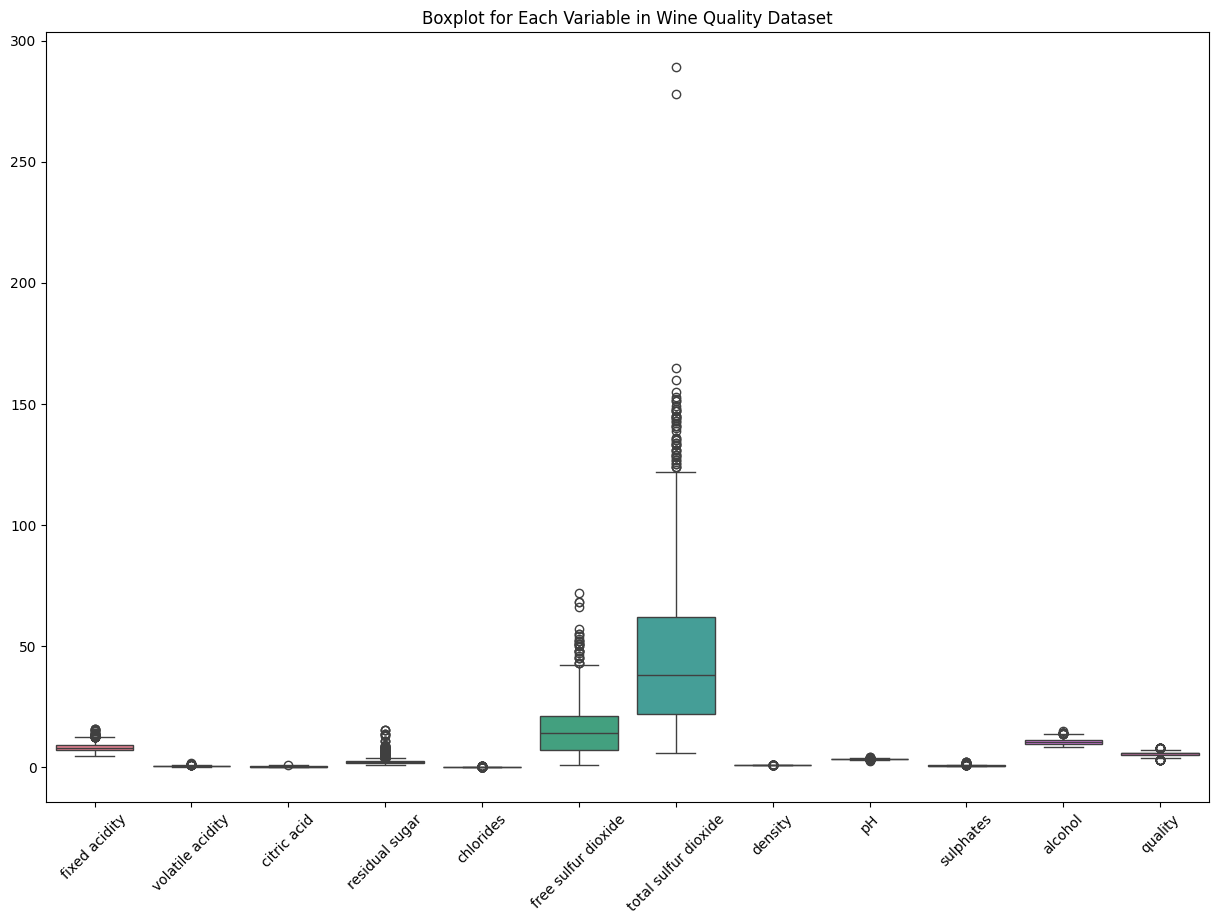

In [87]:
# Boxplot for each variable to identify outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title('Boxplot for Each Variable in Wine Quality Dataset')
plt.show()


In [88]:
# Function to identify outliers in a column
def identify_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Loop through each column and print outliers
for column in data.columns:
    outliers = identify_outliers(column)
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)
    else:
        print(f"No outliers detected in '{column}'.")


Outliers in 'fixed acidity':
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
206            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120   

### Handling and visualizing outliers before and after replacing with median ###
Calculate the Interquartile Range (IQR) for the variables.
Remove data points that lie beyond 1.5 times the IQR from the first and third quartile.
Data Cleaning:
Check for any missing values.
Ensure all data types are appropriate for the analysis.
Looking for any duplicate rows.

I will create boxplots of the variables before removing outliers. Then, I'll apply the function to remove outliers for all variables and visualize the boxplots again to compare the distributions before and after outlier removal.
Visualize Boxplots Before Removing Outliers.
Remove Outliers from All Variables.
Visualize Boxplots After Removing Outliers.


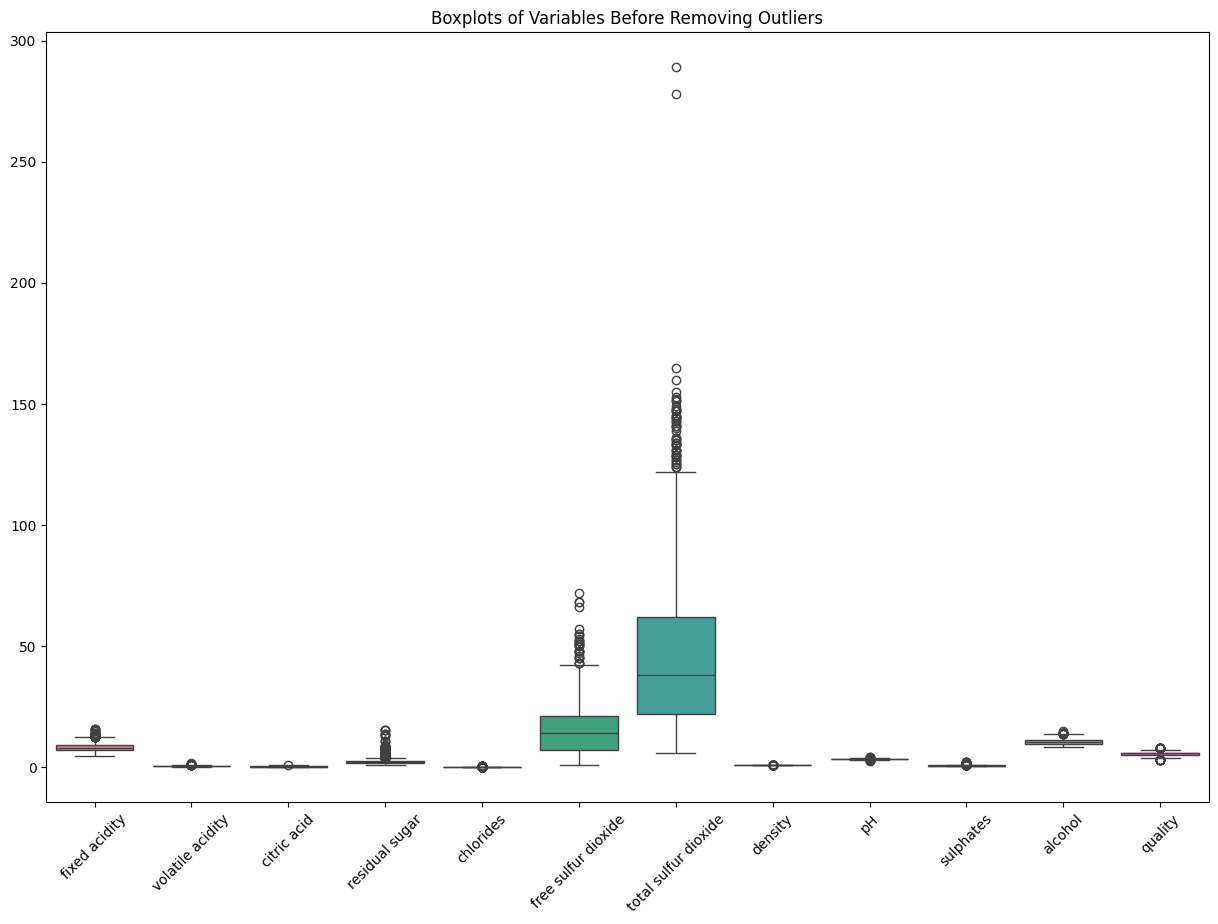

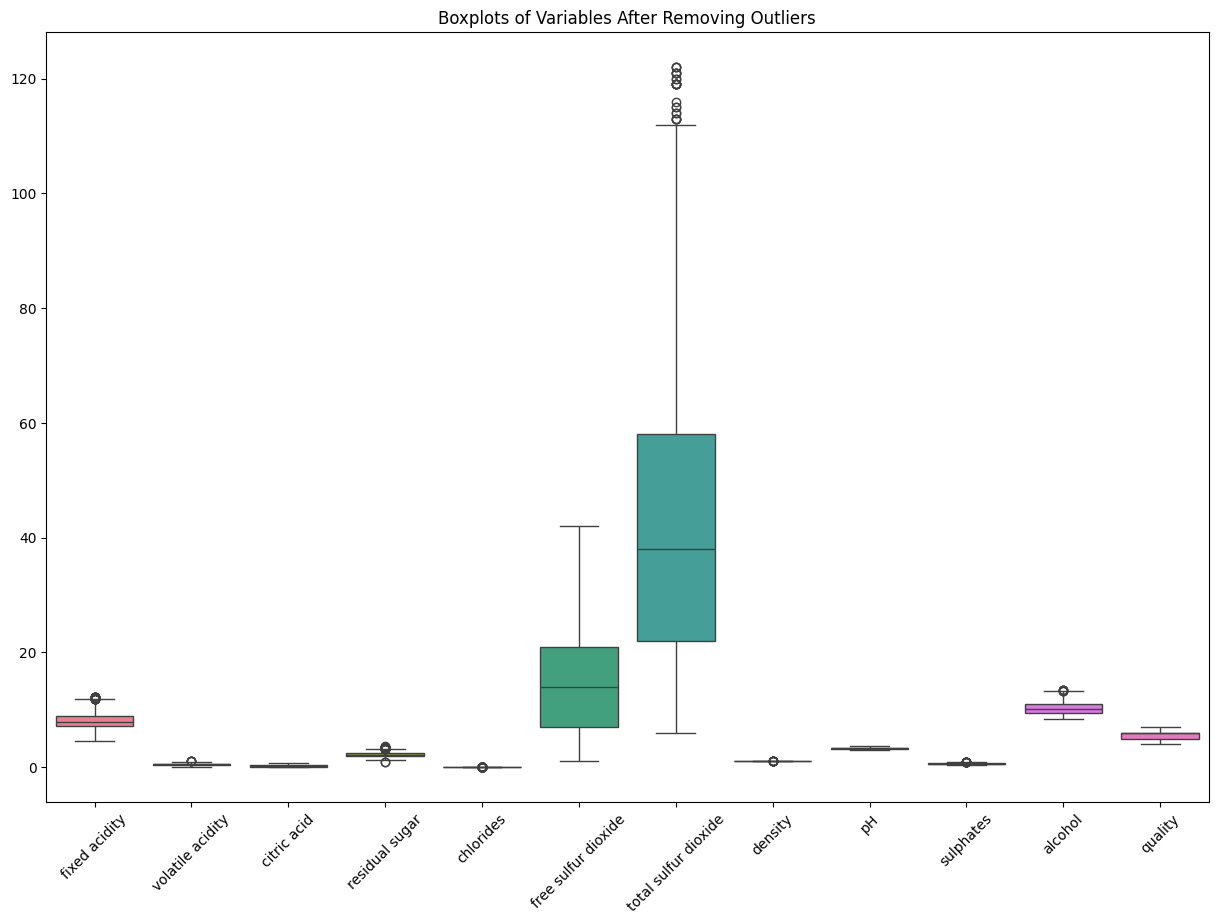

Missing values by column (after cleaning):
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data types (after cleaning):
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

Number of duplicate rows (after cleaning):
243


In [89]:
# Function to replace outliers with median using IQR for all columns
def replace_outliers_with_median(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df[column].median()
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df


# Visualize boxplots before removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title('Boxplots of Variables Before Removing Outliers')
plt.xticks(rotation=45)
plt.show()

# Apply the function to replace outliers from all variables with median
data_clean = replace_outliers_with_median(data.copy())

# Visualize boxplots after removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_clean)
plt.title('Boxplots of Variables After Removing Outliers')
plt.xticks(rotation=45)
plt.show()

# Check for missing values, data types, and duplicates in the cleaned data
missing_values = data_clean.isnull().sum()
data_types = data_clean.dtypes
# Identify duplicate rows
duplicate_rows = data_clean.duplicated().sum()

# Output the results for the cleaned data
print("Missing values by column (after cleaning):")
print(missing_values)
print("\nData types (after cleaning):")
print(data_types)
print("\nNumber of duplicate rows (after cleaning):")
print(duplicate_rows)


In [90]:
# Get the shape of the data after removing outliers
data_shape_after_outliers_replaced_with_median = data_clean.shape

# Output the shape
print("Shape of the data after removing outliers:")
print(data_shape_after_outliers_replaced_with_median)


Shape of the data after removing outliers:
(1599, 12)


In [91]:
# Remove duplicate rows
data_clean = data.drop_duplicates()

# Confirm removal of duplicates
print(f"Number of duplicate rows after removal: {data_clean.duplicated().sum()}")


Number of duplicate rows after removal: 0


In [92]:
data_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [93]:
data_clean.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
246,7.1,0.680,0.07,1.9,0.075,16.0,51.0,0.99685,3.38,0.52,9.5,5
710,10.6,1.025,0.43,2.8,0.080,21.0,84.0,0.99850,3.06,0.57,10.1,5
881,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6
1165,8.5,0.440,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
1271,7.3,0.440,0.20,1.6,0.049,24.0,64.0,0.99350,3.38,0.57,11.7,6
336,8.9,0.430,0.45,1.9,0.052,6.0,16.0,0.99480,3.35,0.70,12.5,6
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
935,8.8,0.300,0.38,2.3,0.060,19.0,72.0,0.99543,3.39,0.72,11.8,6
610,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5


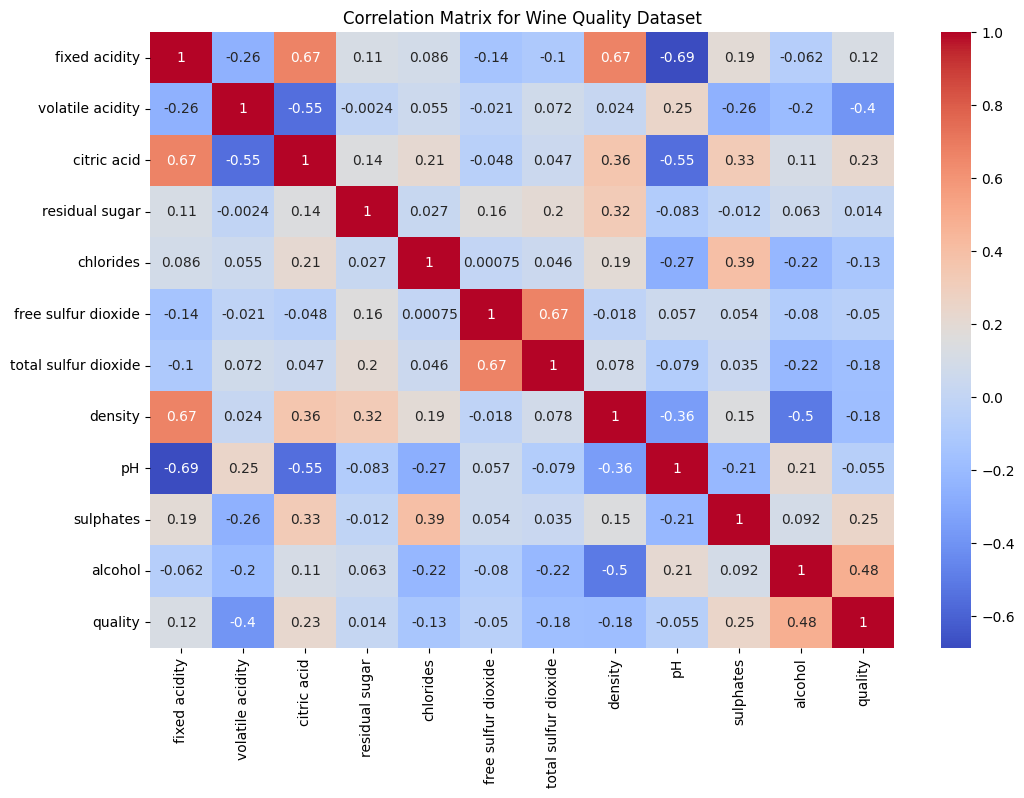

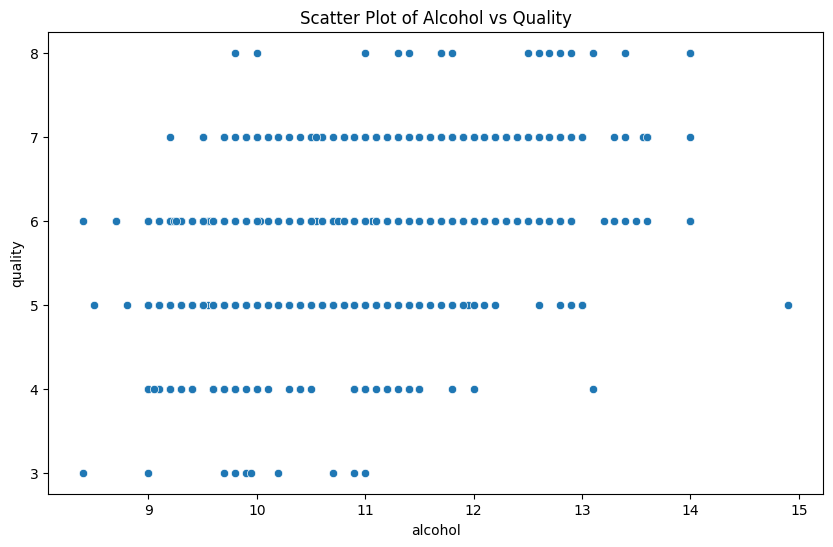

In [94]:

# Further Analysis: Correlation matrix to understand relationships
correlation_matrix = data_clean.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Wine Quality Dataset')
plt.show()

# Scatter plot between "alcohol" and "quality"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data_clean)
plt.title('Scatter Plot of Alcohol vs Quality')
plt.show()

## 7. calculate, visualize, and interpret the measures of central tendency for each variable ##


Fixed acidity - Mean: 8.31, Median: 7.9, Mode: 7.2
Interpretation: The distribution of fixed acidity is right-skewed and not unimodal.


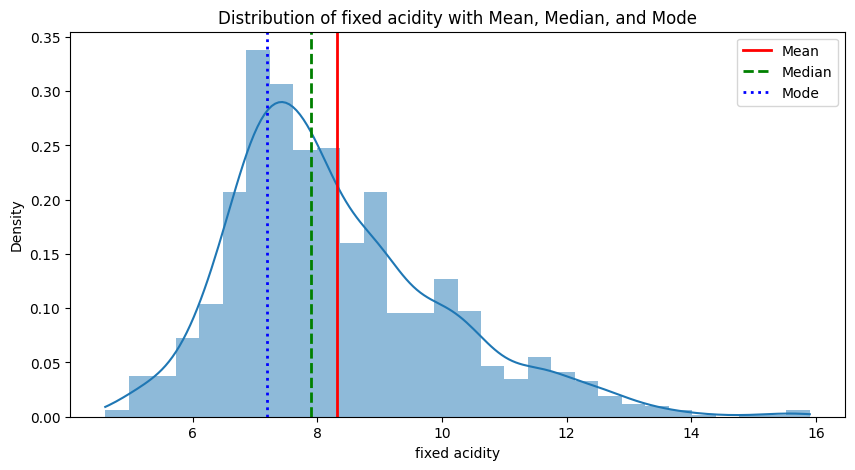


Volatile acidity - Mean: 0.53, Median: 0.52, Mode: 0.5
Interpretation: The distribution of volatile acidity is right-skewed and not unimodal.


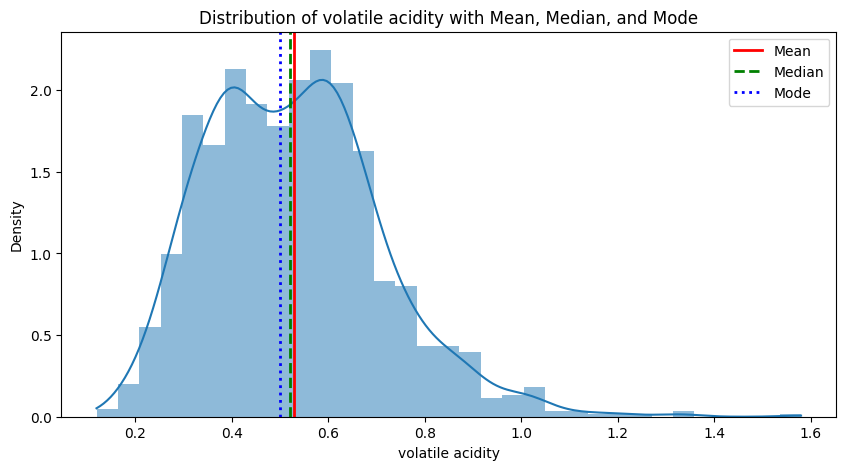


Citric acid - Mean: 0.27, Median: 0.26, Mode: 0.0
Interpretation: The distribution of citric acid is right-skewed and not unimodal.


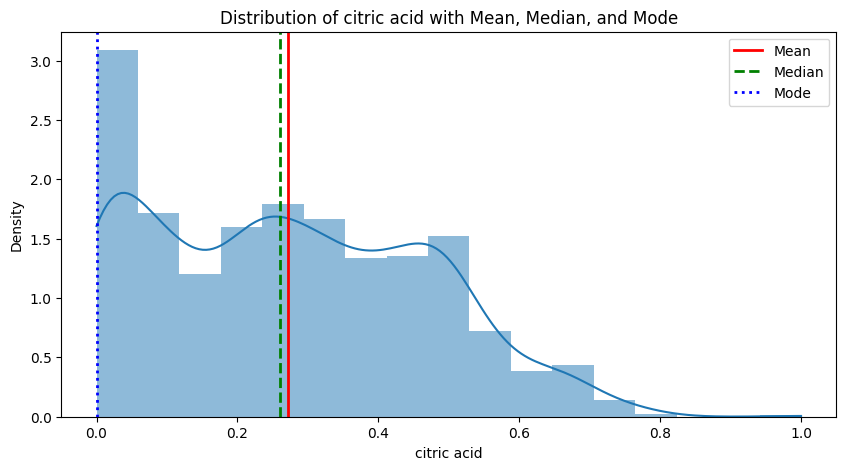


Residual sugar - Mean: 2.52, Median: 2.2, Mode: 2.0
Interpretation: The distribution of residual sugar is right-skewed and not unimodal.


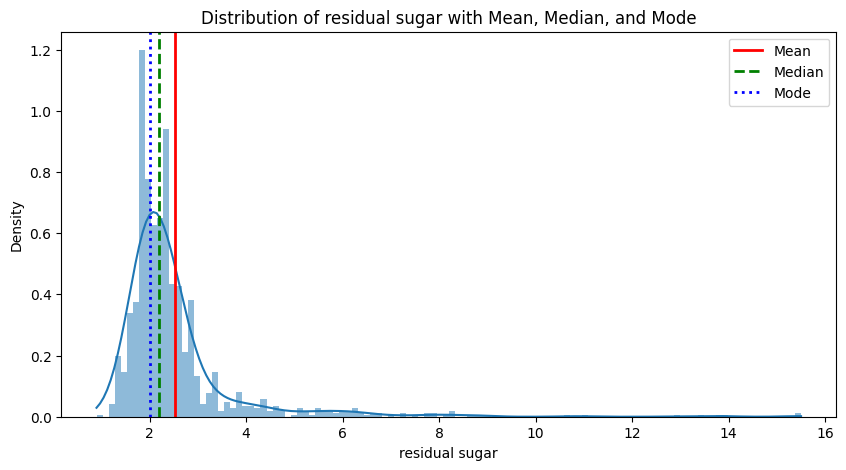


Chlorides - Mean: 0.09, Median: 0.079, Mode: 0.08
Interpretation: The distribution of chlorides is right-skewed and not unimodal.


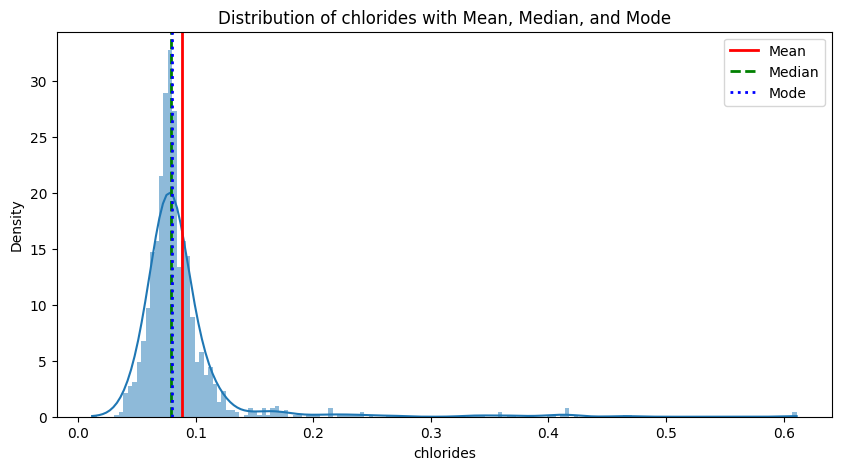


Free sulfur dioxide - Mean: 15.89, Median: 14.0, Mode: 6.0
Interpretation: The distribution of free sulfur dioxide is right-skewed and not unimodal.


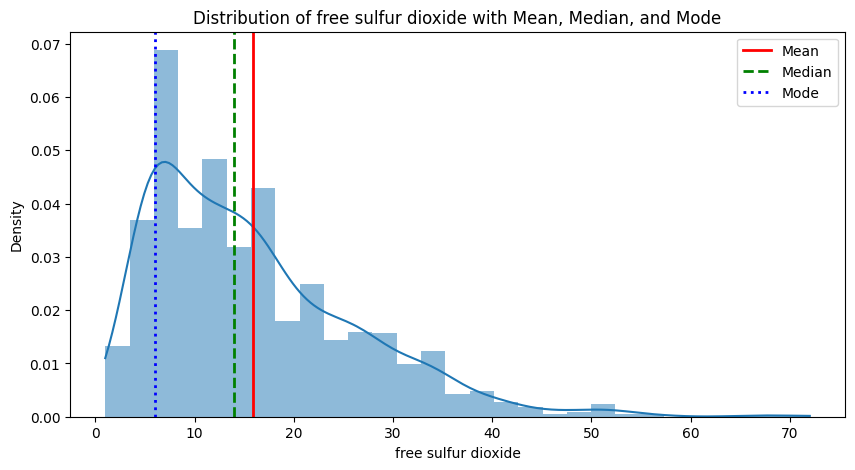


Total sulfur dioxide - Mean: 46.83, Median: 38.0, Mode: 28.0
Interpretation: The distribution of total sulfur dioxide is right-skewed and not unimodal.


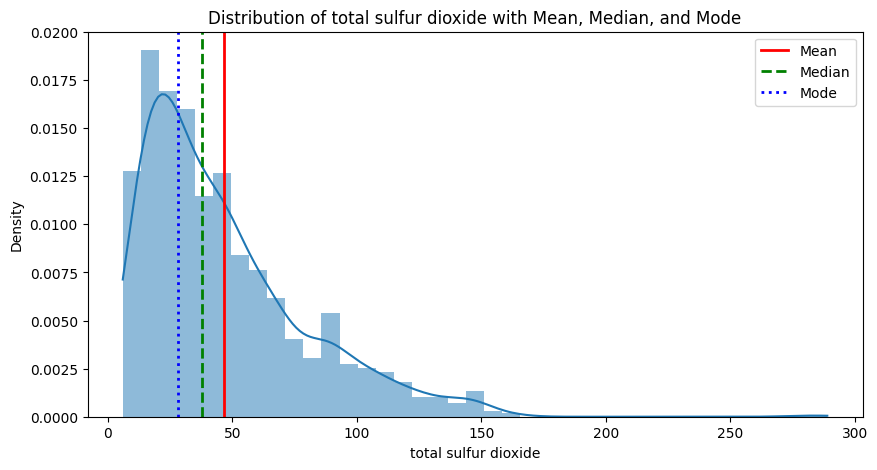


Density - Mean: 1.00, Median: 0.9967, Mode: 0.9968
Interpretation: The distribution of density is right-skewed and not unimodal.


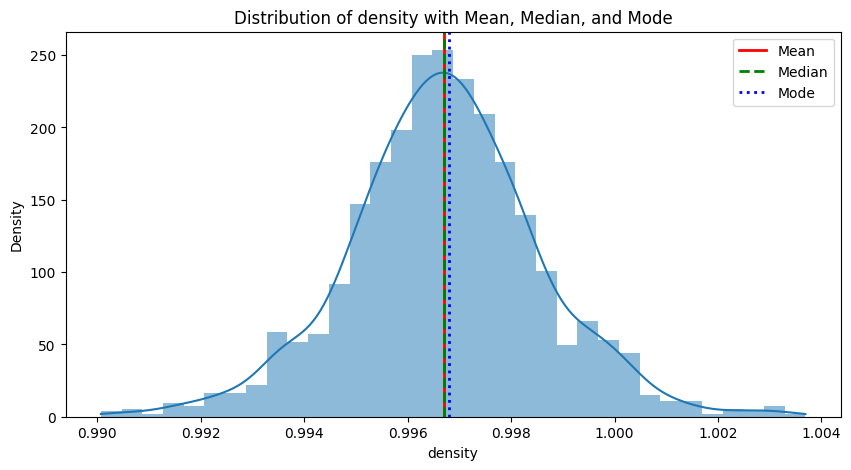


Ph - Mean: 3.31, Median: 3.31, Mode: 3.3
Interpretation: The distribution of pH is left-skewed and not unimodal.


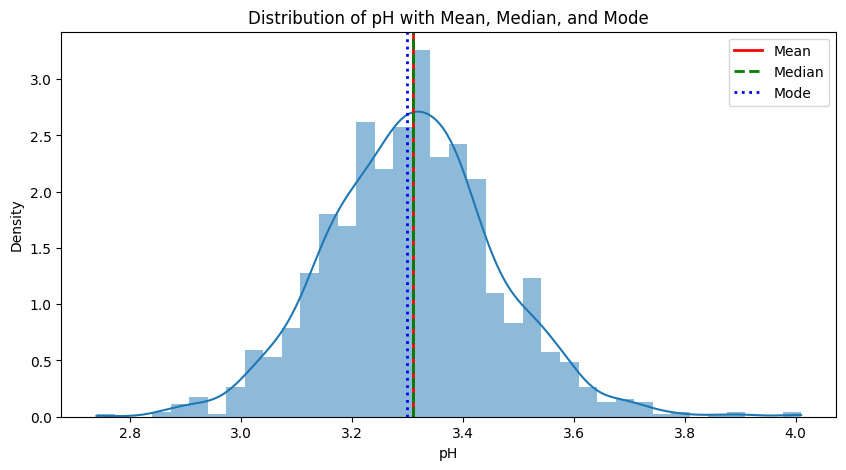


Sulphates - Mean: 0.66, Median: 0.62, Mode: 0.54
Interpretation: The distribution of sulphates is right-skewed and not unimodal.


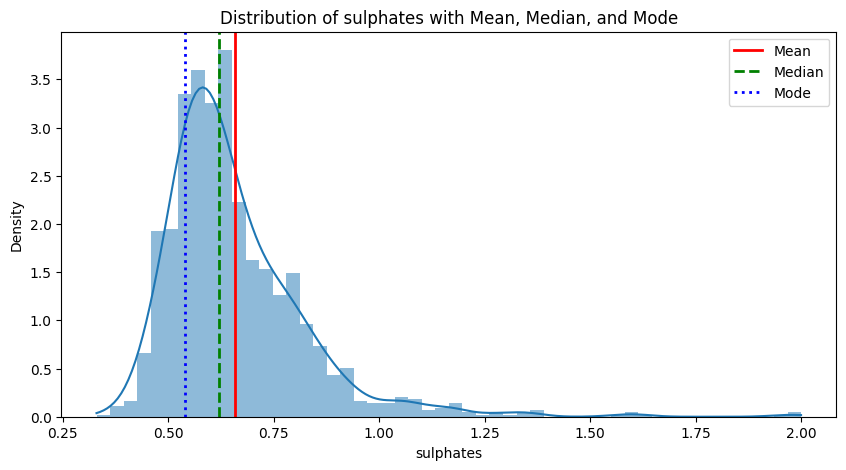


Alcohol - Mean: 10.43, Median: 10.2, Mode: 9.5
Interpretation: The distribution of alcohol is right-skewed and not unimodal.


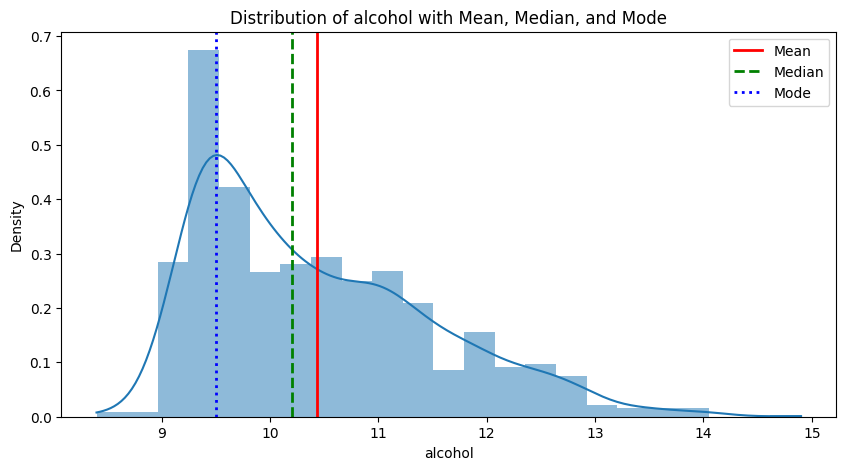


Quality - Mean: 5.62, Median: 6.0, Mode: 5
Interpretation: The distribution of quality is left-skewed and not unimodal.


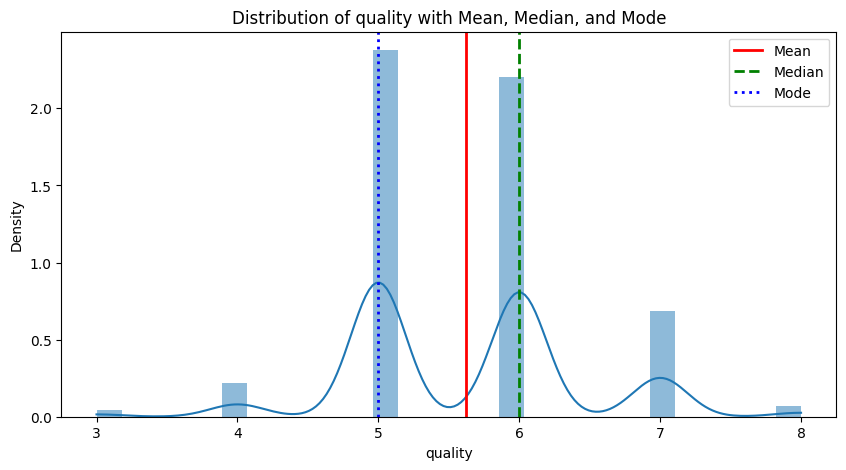

In [95]:
# Explaining, calculating, and visualizing measures of central tendency for each variable
for column in data_clean.columns:
    # Calculate the measures of central tendency
    mean_value = data_clean[column].mean()
    median_value = data_clean[column].median()
    mode_value = data_clean[column].mode()[0]  # Mode can have multiple values; we take the first one

    # Print the calculations
    print(f"\n{column.capitalize()} - Mean: {mean_value:.2f}, Median: {median_value}, Mode: {mode_value}")
    
    # Interpretation of the measures
    print(f"Interpretation: The distribution of {column} is ", end="")
    if mean_value > median_value:
        print("right-skewed", end="")
    elif mean_value < median_value:
        print("left-skewed", end="")
    else:
        print("symmetric", end="")
    if mode_value == mean_value == median_value:
        print(" and unimodal.")
    elif mode_value != mean_value:
        print(" and not unimodal.")
    
    # Visualization of the measures
    plt.figure(figsize=(10, 5))
    sns.histplot(data_clean[column], kde=True, stat="density", linewidth=0)
    plt.axvline(mean_value, color='r', linestyle='-', linewidth=2, label='Mean')
    plt.axvline(median_value, color='g', linestyle='--', linewidth=2, label='Median')
    plt.axvline(mode_value, color='b', linestyle=':', linewidth=2, label='Mode')
    plt.legend()
    plt.title(f'Distribution of {column} with Mean, Median, and Mode')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


## 8. calculate, visualize, and interpret the measures of Dispersion for each variable ##


Fixed acidity - Std Dev: 1.74, Variance: 3.02, Range: 11.3, IQR: 2.0999999999999996
Interpretation: The spread of fixed acidity is small, indicating low variability.

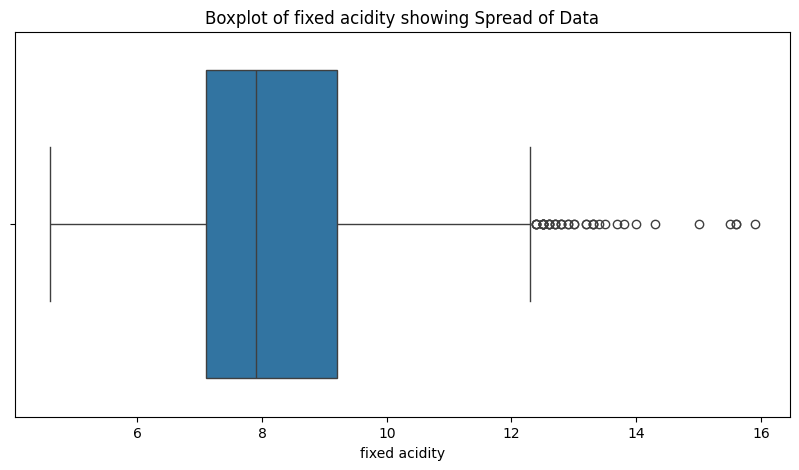


Volatile acidity - Std Dev: 0.18, Variance: 0.03, Range: 1.46, IQR: 0.25
Interpretation: The spread of volatile acidity is large, indicating high variability.

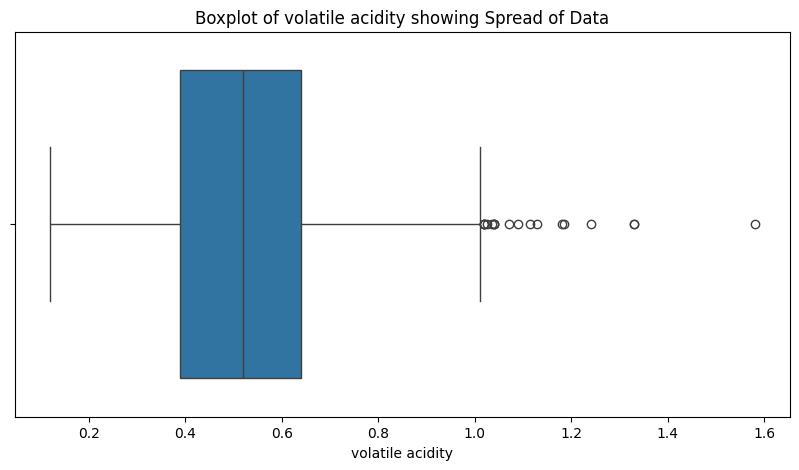


Citric acid - Std Dev: 0.20, Variance: 0.04, Range: 1.0, IQR: 0.33999999999999997
Interpretation: The spread of citric acid is large, indicating high variability.

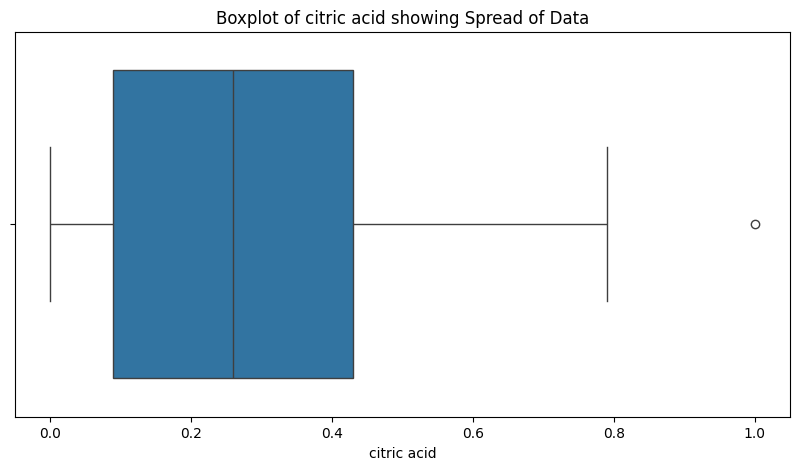


Residual sugar - Std Dev: 1.35, Variance: 1.83, Range: 14.6, IQR: 0.7000000000000002
Interpretation: The spread of residual sugar is large, indicating high variability.

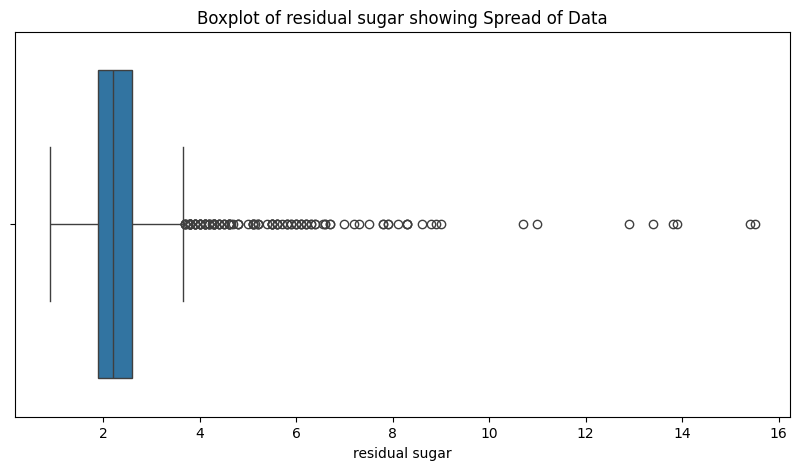


Chlorides - Std Dev: 0.05, Variance: 0.00, Range: 0.599, IQR: 0.02099999999999999
Interpretation: The spread of chlorides is large, indicating high variability.

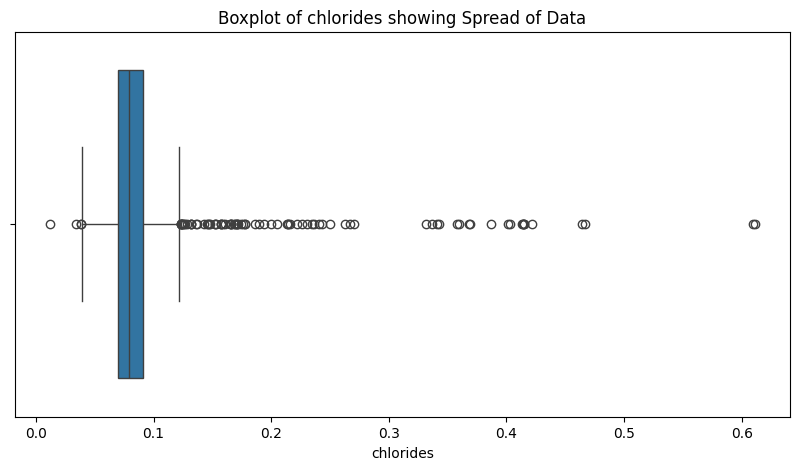


Free sulfur dioxide - Std Dev: 10.45, Variance: 109.15, Range: 71.0, IQR: 14.0
Interpretation: The spread of free sulfur dioxide is large, indicating high variability.

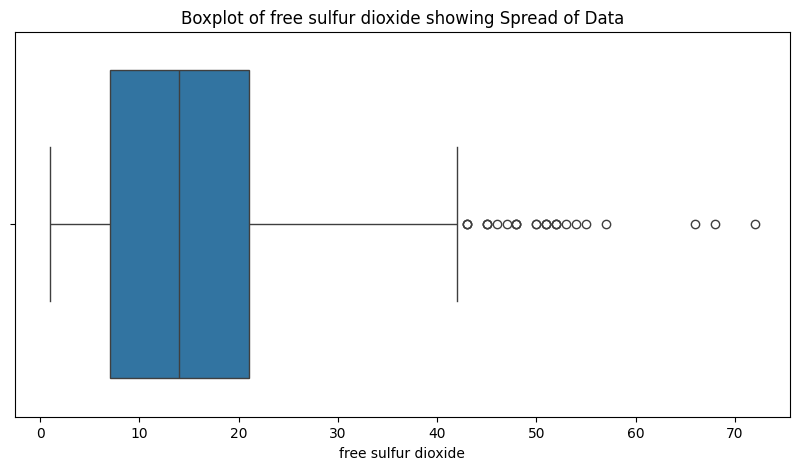


Total sulfur dioxide - Std Dev: 33.41, Variance: 1116.16, Range: 283.0, IQR: 41.0
Interpretation: The spread of total sulfur dioxide is large, indicating high variability.

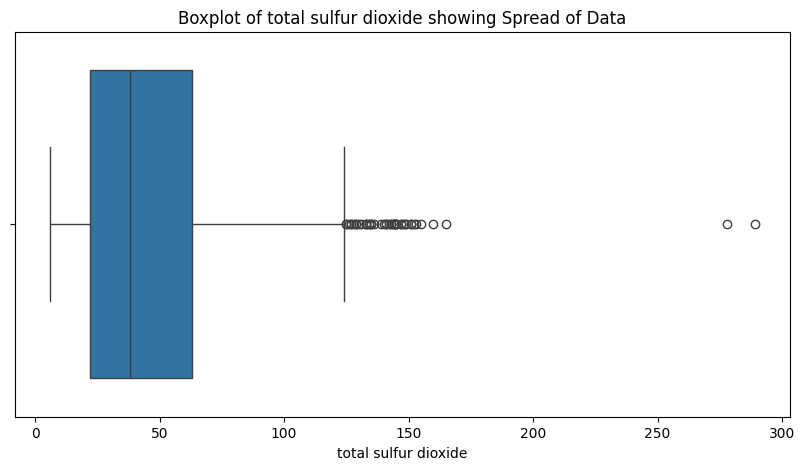


Density - Std Dev: 0.00, Variance: 0.00, Range: 0.013619999999999965, IQR: 0.0022199999999999998
Interpretation: The spread of density is small, indicating low variability.

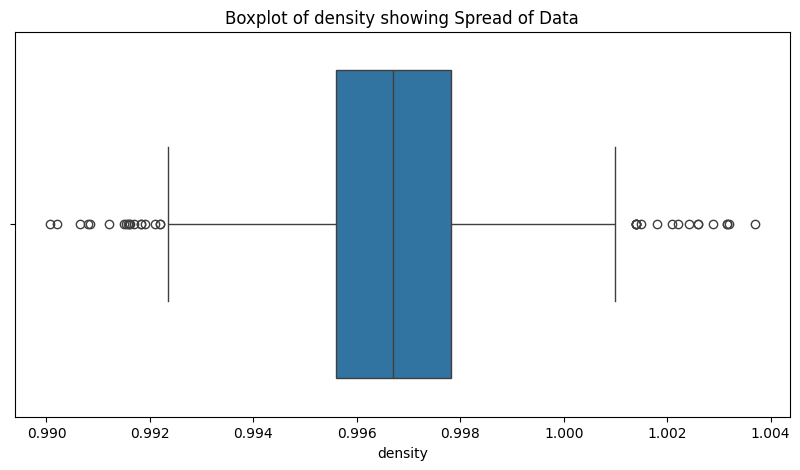


Ph - Std Dev: 0.16, Variance: 0.02, Range: 1.2699999999999996, IQR: 0.18999999999999995
Interpretation: The spread of pH is small, indicating low variability.

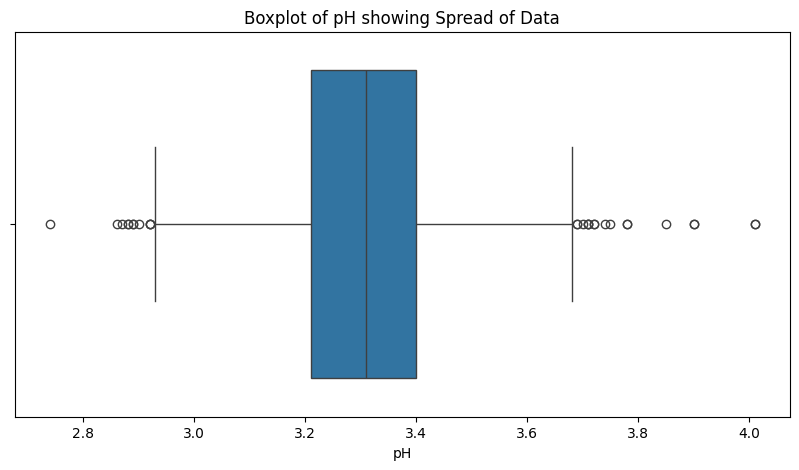


Sulphates - Std Dev: 0.17, Variance: 0.03, Range: 1.67, IQR: 0.17999999999999994
Interpretation: The spread of sulphates is large, indicating high variability.

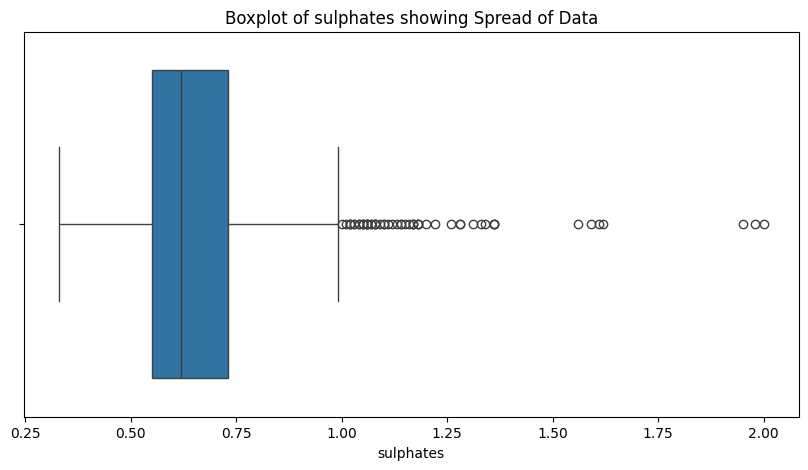


Alcohol - Std Dev: 1.08, Variance: 1.17, Range: 6.5, IQR: 1.5999999999999996
Interpretation: The spread of alcohol is small, indicating low variability.

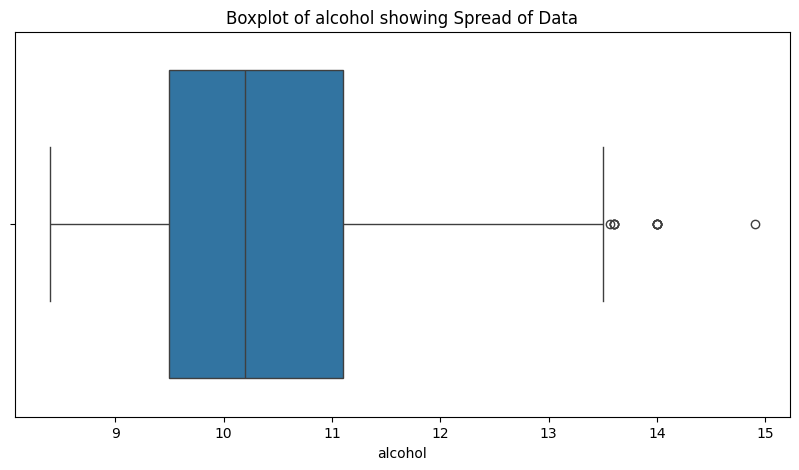


Quality - Std Dev: 0.82, Variance: 0.68, Range: 5, IQR: 1.0
Interpretation: The spread of quality is small, indicating low variability.

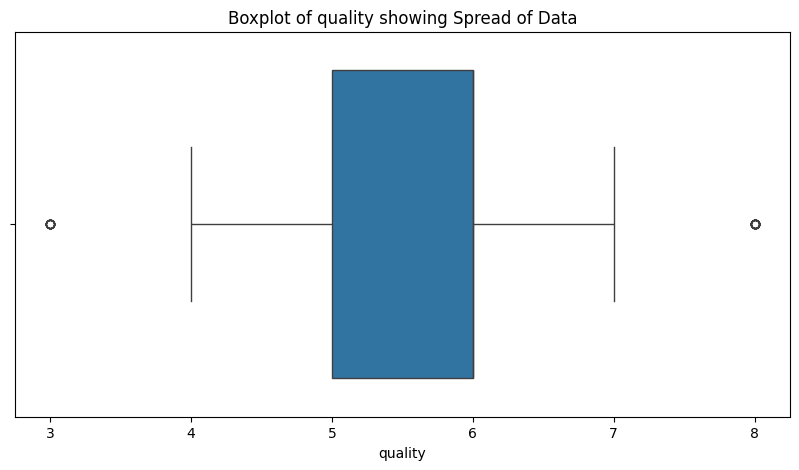

In [96]:
# Explaining, calculating, and visualizing measures of dispersion for each variable
for column in data_clean.columns:
    # Calculate the measures of dispersion
    std_dev = data_clean[column].std()
    variance = data_clean[column].var()
    range_value = data_clean[column].max() - data_clean[column].min()  # Use data_clean for max and min
    iqr = data_clean[column].quantile(0.75) - data_clean[column].quantile(0.25)  # Use data_clean for quantiles

    # Print the calculations
    print(f"\n{column.capitalize()} - Std Dev: {std_dev:.2f}, Variance: {variance:.2f}, Range: {range_value}, IQR: {iqr}")

    # Interpretation of the measures
    mean_value = data_clean[column].mean()  # Calculate mean here to use in interpretation
    print(f"Interpretation: The spread of {column} is ", end="")
    if std_dev > (mean_value / 4):
        print("large, indicating high variability.", end="")
    elif std_dev < (mean_value / 4):
        print("small, indicating low variability.", end="")
    else:
        print("moderate.", end="")
    
    # Visualization of the measures of dispersion
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data_clean[column])
    plt.title(f'Boxplot of {column} showing Spread of Data')
    plt.xlabel(column)
    plt.show()


## 9. calculate, visualize, and interpret the Skewness and kurtosis of each variable ##

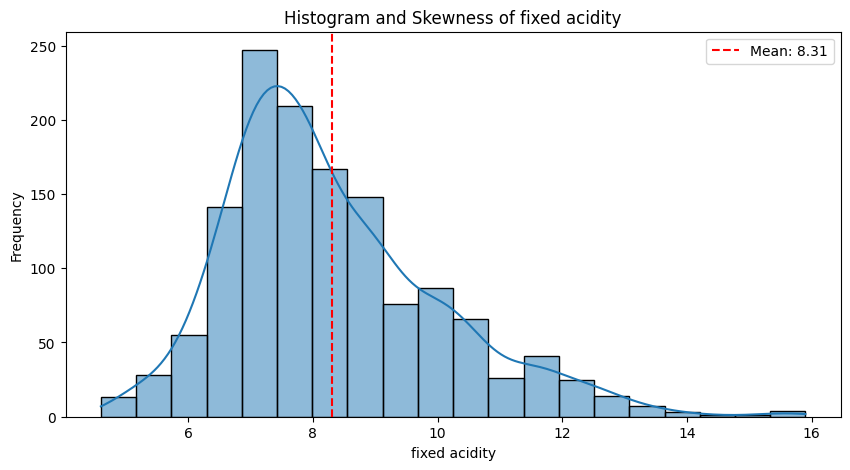


Fixed acidity - Skewness: 0.94
Moderately positively skewed distribution.
Fixed acidity - Kurtosis: 1.05
Leptokurtic distribution (more peaked than normal distribution).


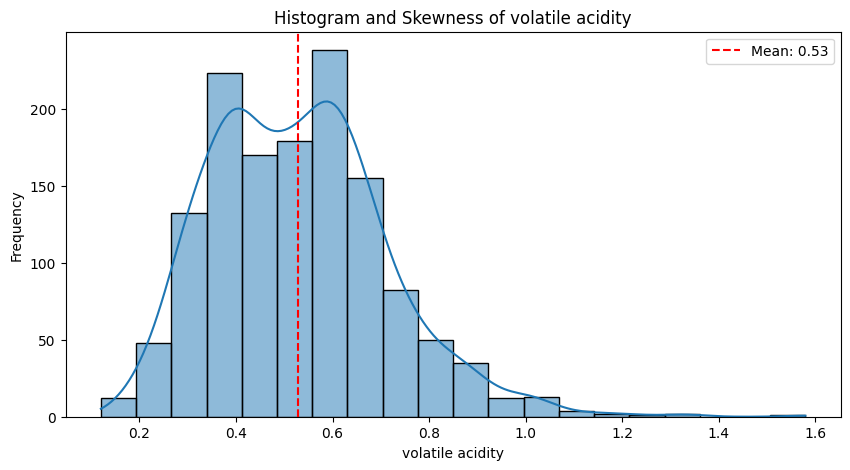


Volatile acidity - Skewness: 0.73
Moderately positively skewed distribution.
Volatile acidity - Kurtosis: 1.25
Leptokurtic distribution (more peaked than normal distribution).


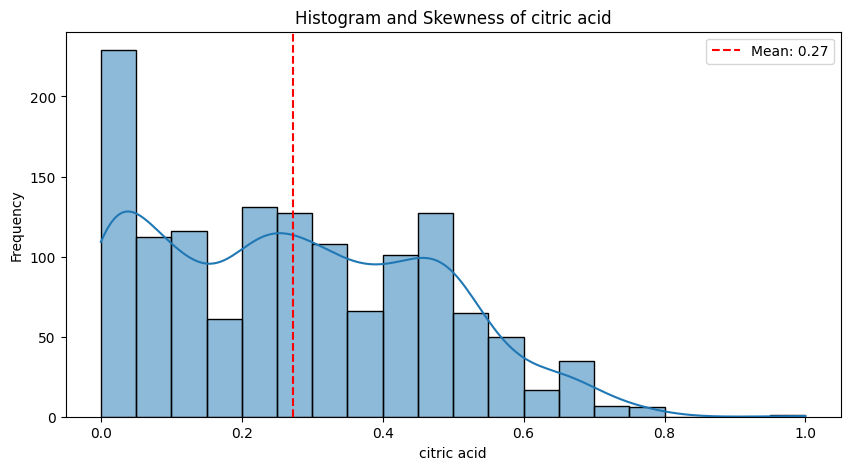


Citric acid - Skewness: 0.31
Approximately symmetric distribution.
Citric acid - Kurtosis: -0.79
Platykurtic distribution (flatter than normal distribution).


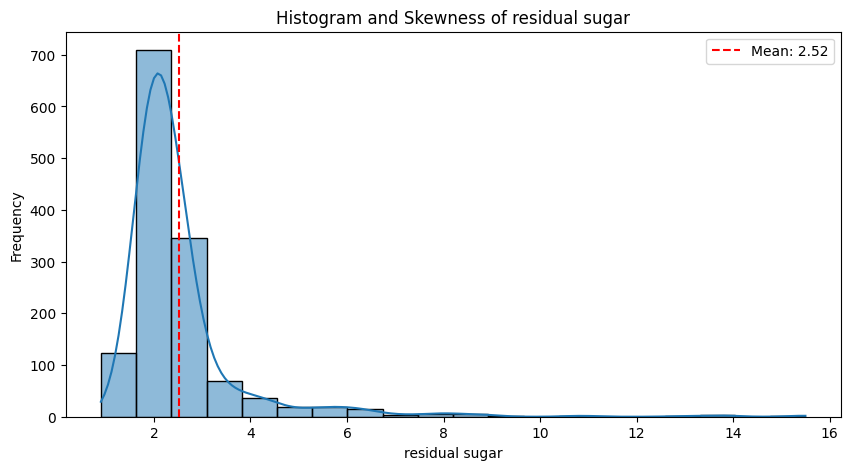


Residual sugar - Skewness: 4.55
Highly positively skewed distribution.
Residual sugar - Kurtosis: 29.36
Leptokurtic distribution (more peaked than normal distribution).


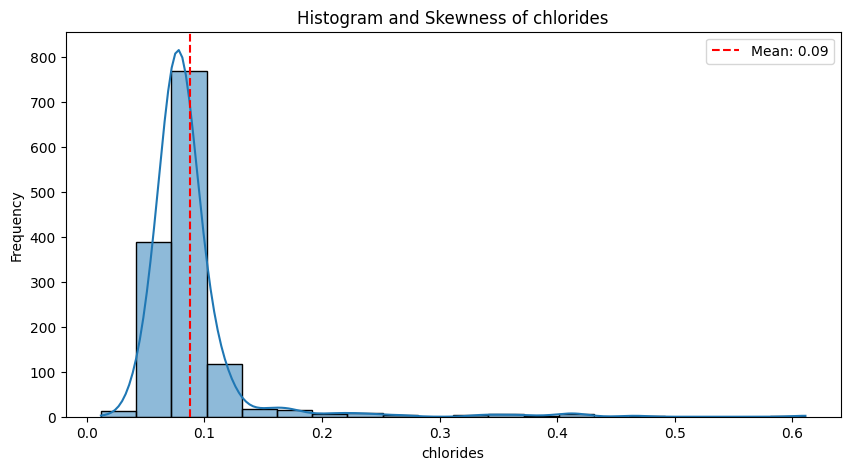


Chlorides - Skewness: 5.50
Highly positively skewed distribution.
Chlorides - Kurtosis: 38.62
Leptokurtic distribution (more peaked than normal distribution).


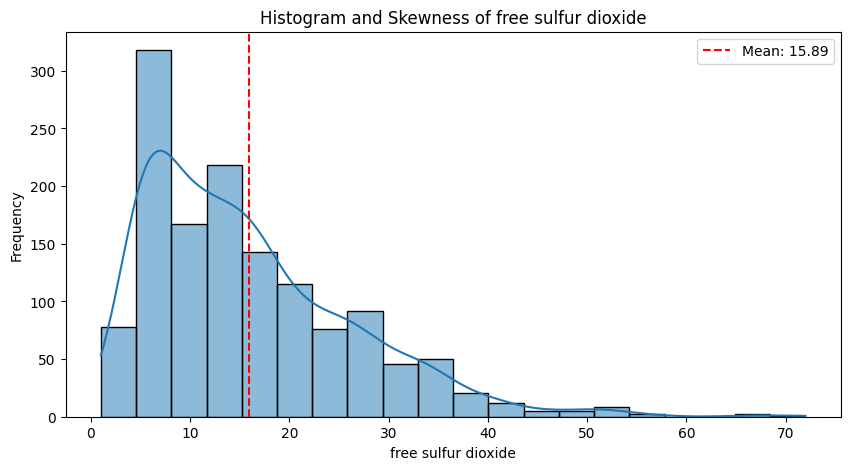


Free sulfur dioxide - Skewness: 1.23
Highly positively skewed distribution.
Free sulfur dioxide - Kurtosis: 1.89
Leptokurtic distribution (more peaked than normal distribution).


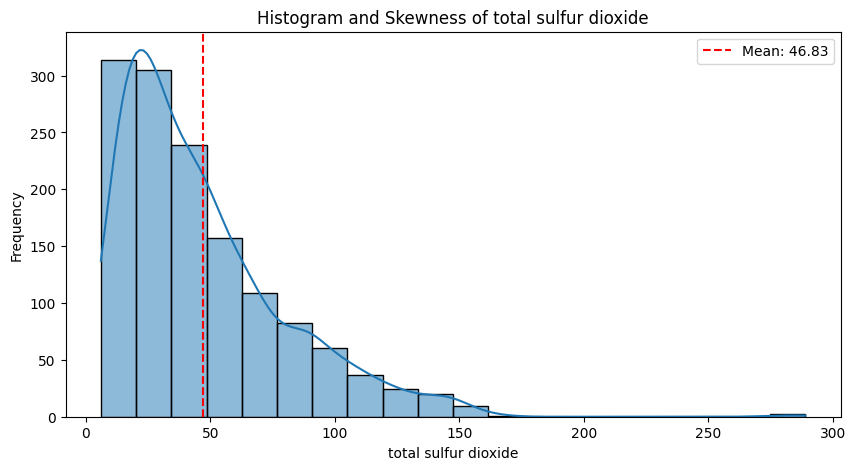


Total sulfur dioxide - Skewness: 1.54
Highly positively skewed distribution.
Total sulfur dioxide - Kurtosis: 4.04
Leptokurtic distribution (more peaked than normal distribution).


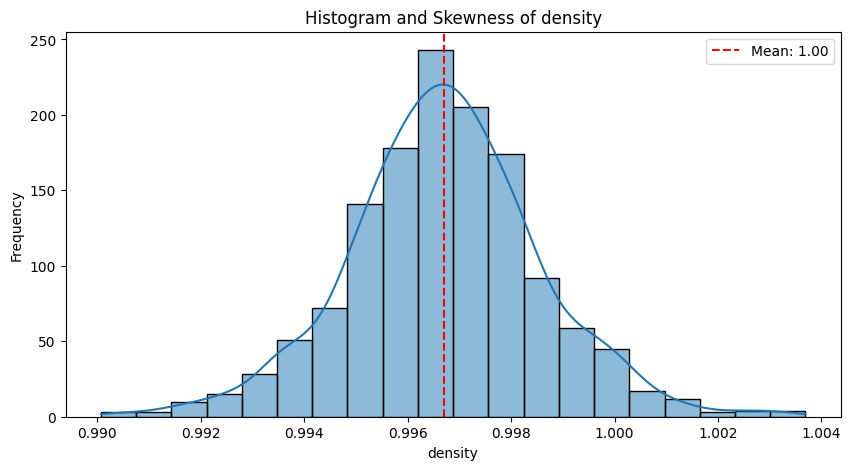


Density - Skewness: 0.04
Approximately symmetric distribution.
Density - Kurtosis: 0.83
Leptokurtic distribution (more peaked than normal distribution).


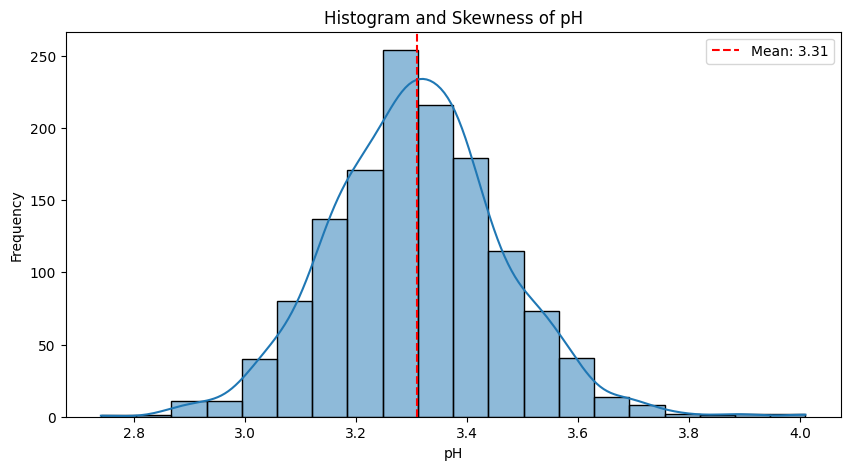


Ph - Skewness: 0.23
Approximately symmetric distribution.
Ph - Kurtosis: 0.88
Leptokurtic distribution (more peaked than normal distribution).


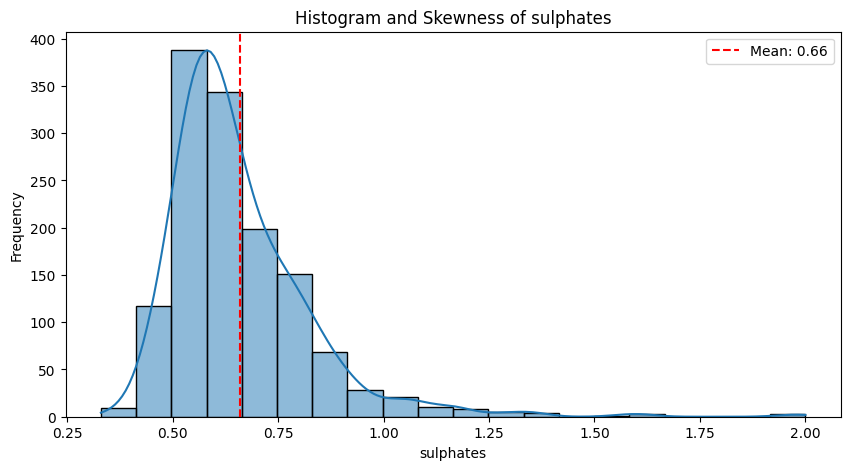


Sulphates - Skewness: 2.41
Highly positively skewed distribution.
Sulphates - Kurtosis: 11.10
Leptokurtic distribution (more peaked than normal distribution).


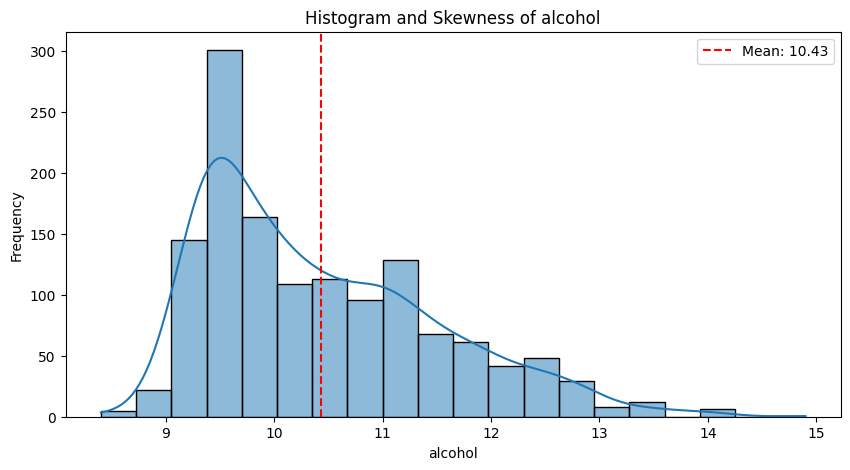


Alcohol - Skewness: 0.86
Moderately positively skewed distribution.
Alcohol - Kurtosis: 0.16
Leptokurtic distribution (more peaked than normal distribution).


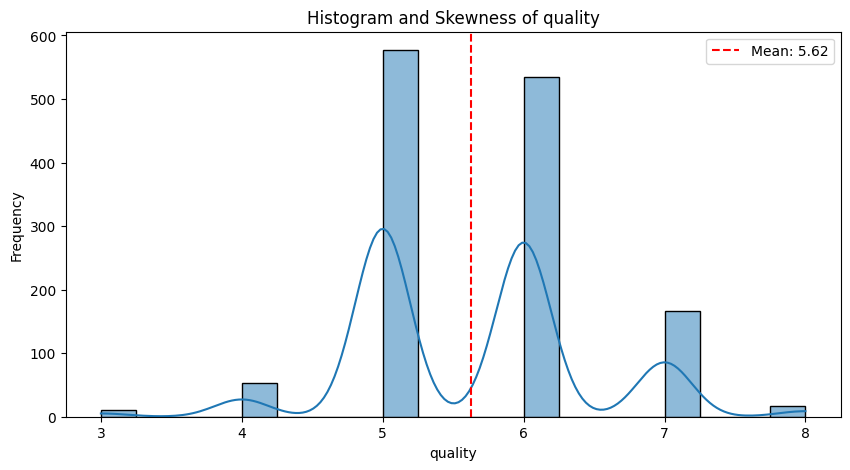


Quality - Skewness: 0.19
Approximately symmetric distribution.
Quality - Kurtosis: 0.34
Leptokurtic distribution (more peaked than normal distribution).

Overall Skewness and Kurtosis:
                      Skewness   Kurtosis
fixed acidity         0.941041   1.049673
volatile acidity      0.729279   1.249243
citric acid           0.312726  -0.788921
residual sugar        4.548153  29.364592
chlorides             5.502487  38.624653
free sulfur dioxide   1.226579   1.892691
total sulfur dioxide  1.540368   4.042257
density               0.044778   0.830659
pH                    0.232032    0.87979
sulphates             2.406505  11.102282
alcohol               0.859841   0.159739
quality               0.192407   0.340256


In [97]:
# Calculate and visualize skewness and kurtosis for each variable
skewness_kurtosis = pd.DataFrame(index=data_clean.columns, columns=['Skewness', 'Kurtosis'])

for column in data_clean.columns:
    # Calculate skewness and kurtosis using data_clean
    skewness_kurtosis.loc[column, 'Skewness'] = data_clean[column].skew()
    skewness_kurtosis.loc[column, 'Kurtosis'] = data_clean[column].kurtosis()

    # Visualize the distribution with a histogram and add a line for skewness
    plt.figure(figsize=(10, 5))
    sns.histplot(data_clean[column], bins=20, kde=True)
    plt.axvline(x=data_clean[column].mean(), color='r', linestyle='--', label=f'Mean: {data_clean[column].mean():.2f}')
    plt.title(f'Histogram and Skewness of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

    # Interpretation of skewness
    skew_value = data_clean[column].skew()
    print(f"\n{column.capitalize()} - Skewness: {skew_value:.2f}")
    if skew_value < -1:
        print("Highly negatively skewed distribution.")
    elif -1 <= skew_value < -0.5:
        print("Moderately negatively skewed distribution.")
    elif -0.5 <= skew_value < 0.5:
        print("Approximately symmetric distribution.")
    elif 0.5 <= skew_value < 1:
        print("Moderately positively skewed distribution.")
    else:
        print("Highly positively skewed distribution.")
    
    # Interpretation of kurtosis
    kurt_value = data_clean[column].kurtosis()
    print(f"{column.capitalize()} - Kurtosis: {kurt_value:.2f}")
    if kurt_value < 0:
        print("Platykurtic distribution (flatter than normal distribution).")
    elif kurt_value == 0:
        print("Mesokurtic distribution (similar to normal distribution).")
    else:
        print("Leptokurtic distribution (more peaked than normal distribution).")

# Print the overall skewness and kurtosis table
print("\nOverall Skewness and Kurtosis:")
print(skewness_kurtosis)


## 10.create a histogram depicting the frequency distribution and interpret the plot ##

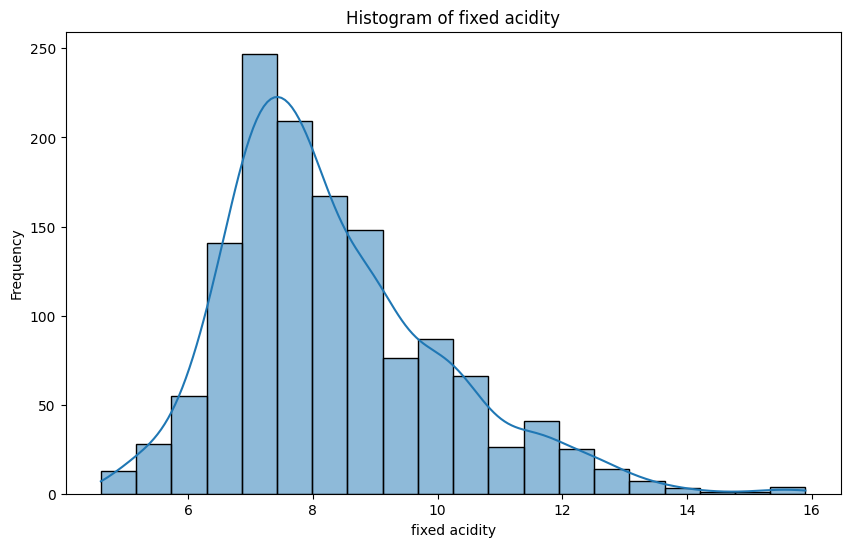

Interpretation for fixed acidity:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



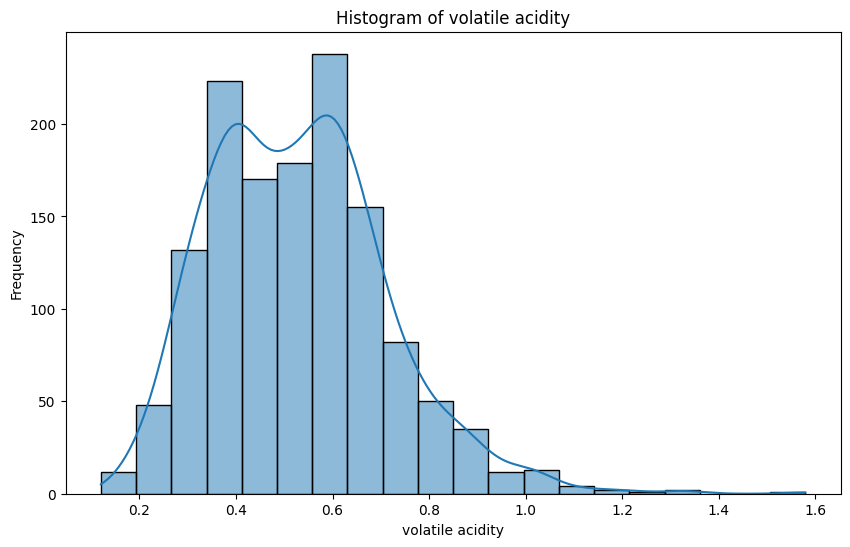

Interpretation for volatile acidity:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



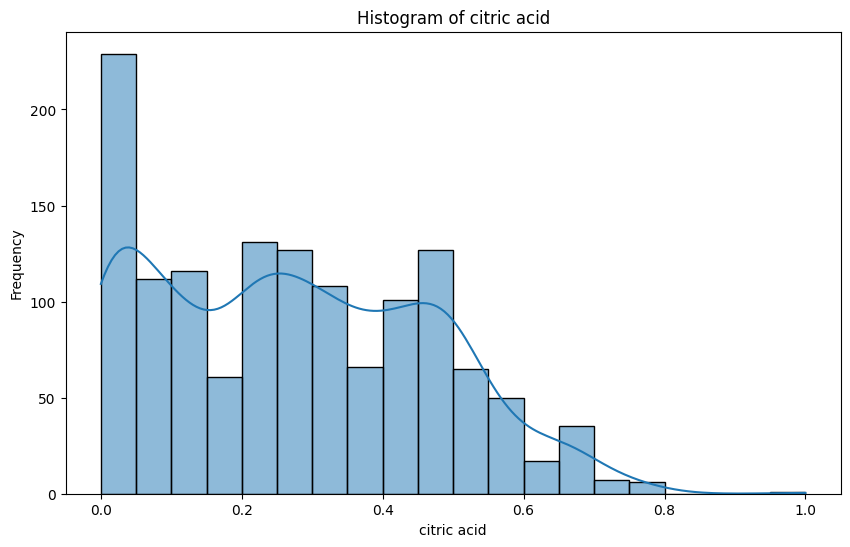

Interpretation for citric acid:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



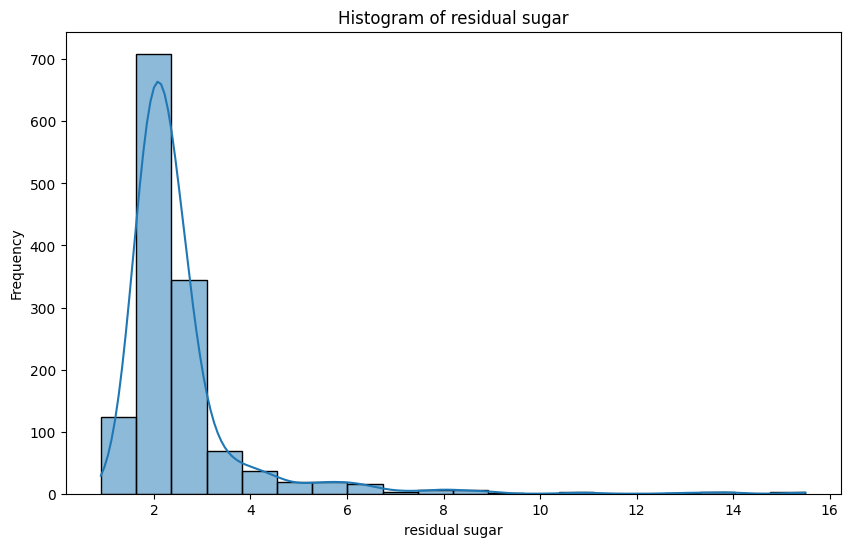

Interpretation for residual sugar:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



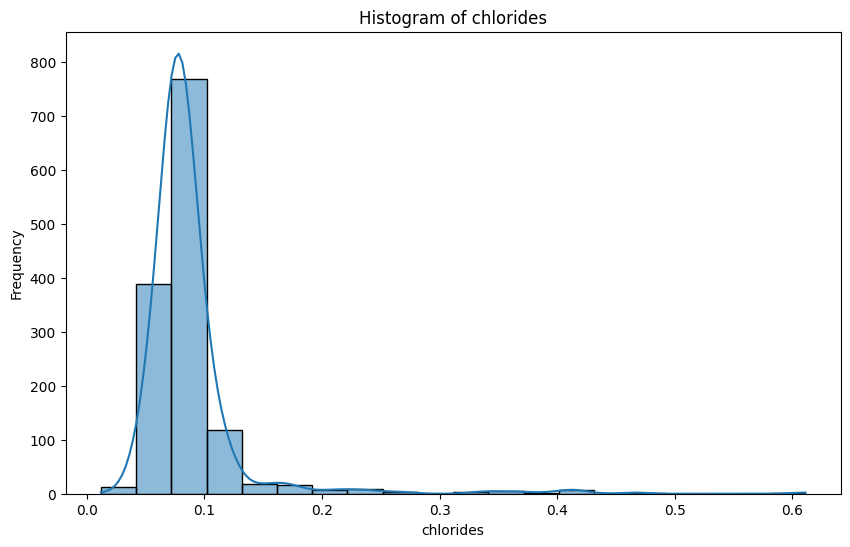

Interpretation for chlorides:
  The distribution is right-skewed.
  This indicates the concentration of certain chemicals is distributed as shown in the histogram.



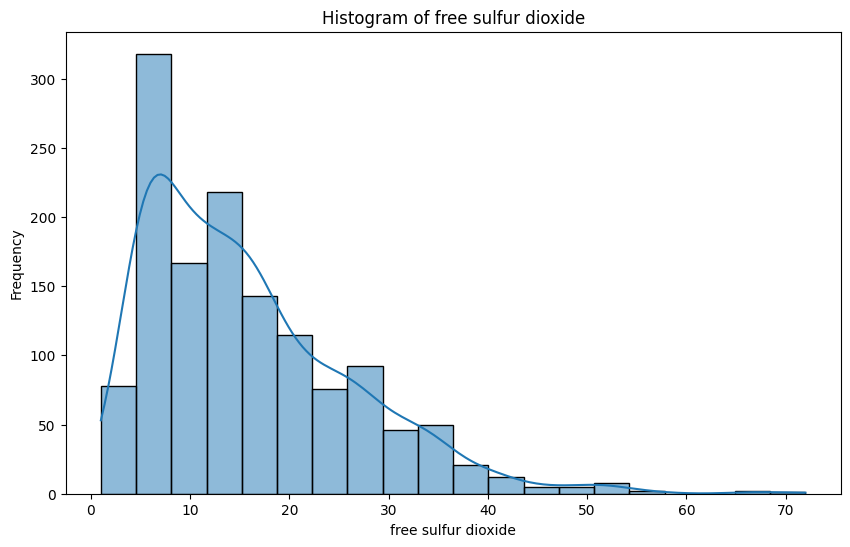

Interpretation for free sulfur dioxide:
  The distribution is right-skewed.
  This indicates the concentration of certain chemicals is distributed as shown in the histogram.



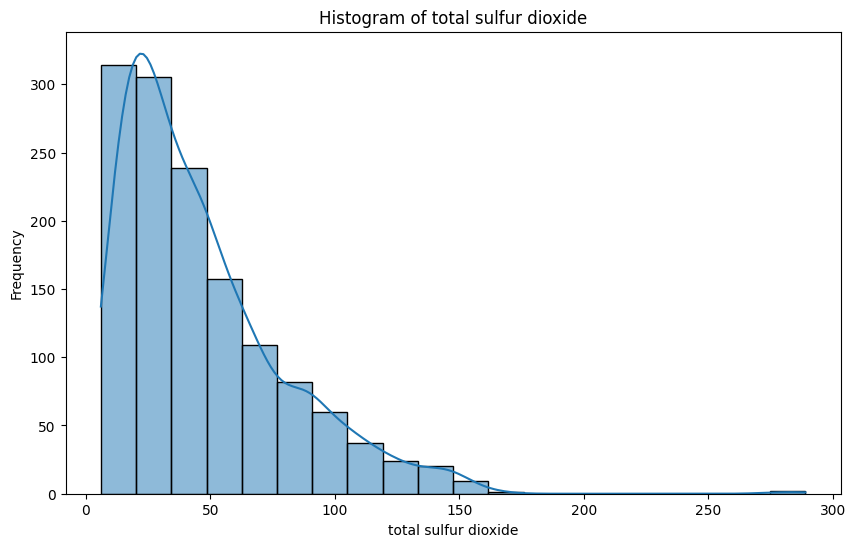

Interpretation for total sulfur dioxide:
  The distribution is right-skewed.
  This indicates the concentration of certain chemicals is distributed as shown in the histogram.



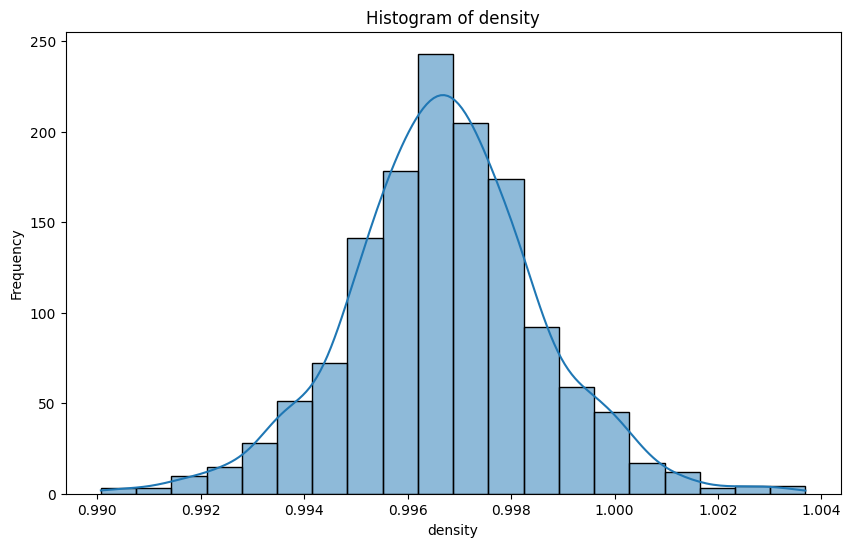

Interpretation for density:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



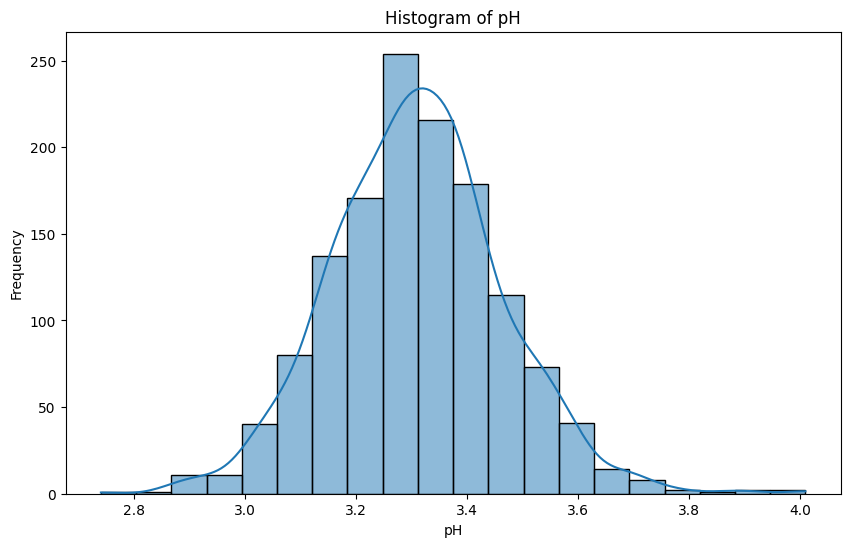

Interpretation for pH:
  The distribution is right-skewed.
  This indicates the acidity level of the wine is distributed as shown in the histogram.



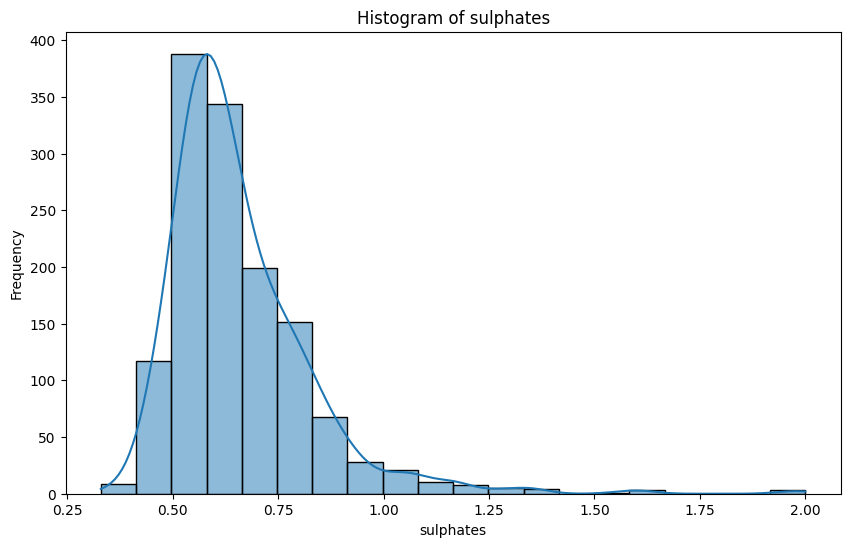

Interpretation for sulphates:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



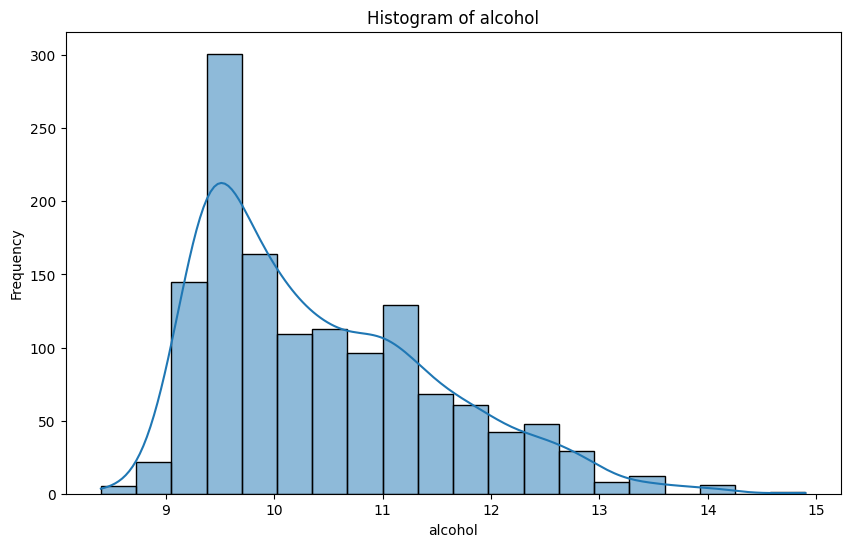

Interpretation for alcohol:
  The distribution is right-skewed.
  This indicates the specific physical characteristic of the wine is distributed as shown in the histogram.



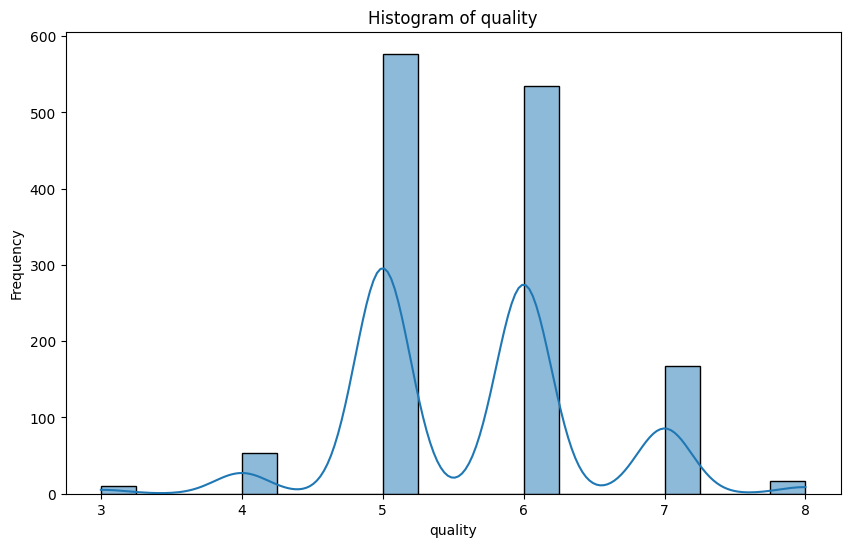

Interpretation for quality:
  The distribution is right-skewed.
  This indicates the overall wine quality scores are distributed as shown in the histogram.



In [98]:
# Create a histogram for each variable and interpret the plots
for column in data_clean.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_clean[column], kde=True, bins=20)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

    # Interpretation based on the histogram
    skewness = data_clean[column].skew()
    print(f"Interpretation for {column}:")
    if skewness > 0:
        print("  The distribution is right-skewed.")
    elif skewness < 0:
        print("  The distribution is left-skewed.")
    else:
        print("  The distribution is approximately symmetric.")
    print("  This indicates ", end="")
    if "quality" in column:
        print("the overall wine quality scores are ", end="")
    elif "sulfur dioxide" in column or "chlorides" in column:
        print("the concentration of certain chemicals is ", end="")
    elif "pH" in column:
        print("the acidity level of the wine is ", end="")
    else:
        print("the specific physical characteristic of the wine is ", end="")
    print("distributed as shown in the histogram.\n")


## Simple linear regression in Python ##
Building a simple linear regression in Python using OLS regression by choosing independent variable 'alcohol' and the dependent variable 'quality'.
Also evaluating the model using Mean Squared Error (MSE) & coefficient of Determination (R²) score etc.

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     407.0
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           2.28e-79
Time:                        12:48:51   Log-Likelihood:                -1485.8
No. Observations:                1359   AIC:                             2976.
Df Residuals:                    1357   BIC:                             2986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8092      0.190      9.519      0.0

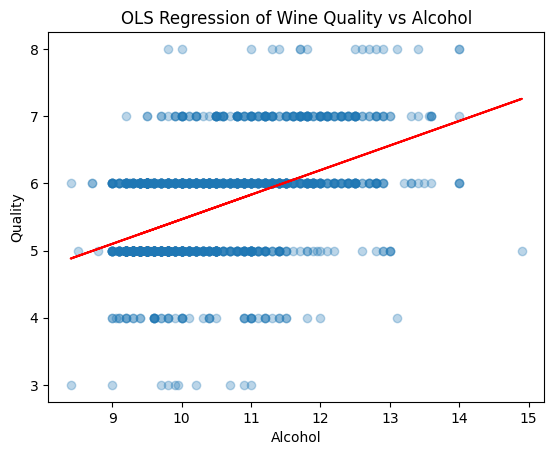

In [99]:
import statsmodels.api as sm

# Define the dependent (response) variable and the independent (predictor) variable
X = data_clean['alcohol']  # Independent variable
y = data_clean['quality']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels OLS)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())

# Plotting the regression line
plt.scatter(data_clean['alcohol'], data_clean['quality'], alpha=0.3)  # Plot the raw data
plt.plot(data_clean['alcohol'], results.predict(X), color='red')  # Plot the regression line
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('OLS Regression of Wine Quality vs Alcohol')
plt.show()


Dependent Variable: The dependent variable, labeled as 'quality', is what the model is trying to predict or explain.
R-squared: This value is 0.231, indicating that approximately 23.1% of the variability in the 'quality' can be explained by the model. It's a measure of how well the independent variables explain the variation in the dependent variable.
Adjusted R-squared: At 0.230, this is a slight modification of R-squared that adjusts for the number of variables in the model. It's very close to R-squared in this case, suggesting that the model isn't overly complex relative to the number of observations.
F-statistic and Prob (F-statistic): The F-statistic is 407.0, and the associated probability is very small (2.28e-79), indicating that the model is statistically significant. This means the model provides a better fit than an empty model.
Coefficients:
const: The constant (intercept) is 1.8092, with a 95% confidence interval ranging from 1.436 to 2.182. This represents the expected value of 'quality' when the independent variable 'alcohol' is zero.
alcohol: The coefficient for 'alcohol' is 0.3656. This suggests that for each one-unit increase in 'alcohol', there is an expected increase of 0.3656 units in 'quality', holding all else constant. The 95% confidence interval for this estimate ranges from 0.330 to 0.401, and since this interval does not include zero and the p-value is less than 0.05, this coefficient is statistically significant.
atistical Tests:
Omnibus: The Omnibus test has a very low p-value, indicating that the residuals (differences between observed and predicted values) are not normally distributed. This might be a concern for the assumptions of the OLS model.
Durbin-Watson: The Durbin-Watson statistic is 1.764, close to 2, suggesting that there is no major issue with autocorrelation in the residuals.
Jarque-Bera (JB): The JB test also has a low p-value, further indicating that the residuals do not follow a normal distribution.
Skew: Near zero, suggesting residuals are symmetrically distributed.
Kurtosis: Higher than 3 (which represents normal distribution), suggesting a heavier tail than a normal distribution.
Conclusion: The model indicates a significant relationship between 'alcohol' and 'quality', but it explains only a modest portion of the variability in 'quality'. Additionally, the tests for normality suggest that the residuals do not follow a normal distribution, which could impact the model's reliability.

To resolve the issue Linearity applying Log Transformation to the variables.

                            OLS Regression Results                            
Dep. Variable:            log_quality   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     357.2
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           6.66e-71
Time:                        12:48:51   Log-Likelihood:                 815.52
No. Observations:                1359   AIC:                            -1627.
Df Residuals:                    1357   BIC:                            -1617.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1260      0.084      1.496      

/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_34119/4075887906.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['log_alcohol'] = np.log(data_clean['alcohol'])
/var/folders/kw/dtj9__8n4qv9bxydv0cs61380000gn/T/ipykernel_34119/4075887906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['log_quality'] = np.log(data_clean['quality'])


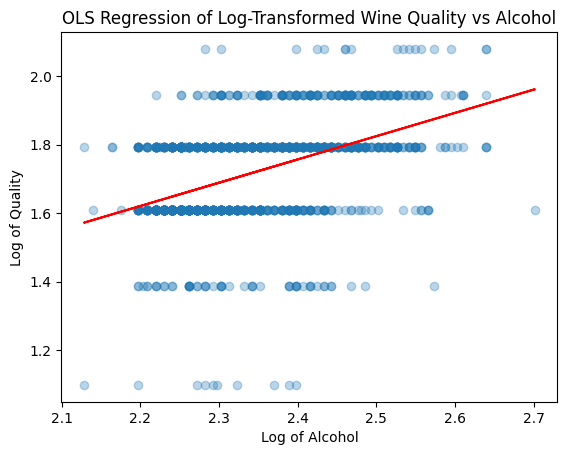

In [100]:
import numpy as np

# Apply log transformation to both variables
data_clean['log_alcohol'] = np.log(data_clean['alcohol'])
data_clean['log_quality'] = np.log(data_clean['quality'])

# Define the dependent (response) variable and the independent (predictor) variable
X = data_clean[['log_alcohol']]  # Independent variable, now log-transformed
y = data_clean['log_quality']    # Dependent variable, now log-transformed

# Add a constant to the independent variable (required for statsmodels OLS)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary of the regression
print(results.summary())

# Plotting the regression line
plt.scatter(data_clean['log_alcohol'], data_clean['log_quality'], alpha=0.3)  # Plot the transformed raw data
plt.plot(data_clean['log_alcohol'], results.predict(X), color='red')  # Plot the regression line
plt.xlabel('Log of Alcohol')
plt.ylabel('Log of Quality')
plt.title('OLS Regression of Log-Transformed Wine Quality vs Alcohol')
plt.show()


Dependent Variable: log_quality indicates that the natural logarithm of the quality score is what you're trying to predict or explain.
R-squared: The R-squared value is 0.208, which means that approximately 20.8% of the variance in the log-transformed quality score can be explained by the log-transformed alcohol variable. This is a measure of the model's goodness of fit.
F-statistic and Prob (F-statistic): The F-statistic is 357.2, and the probability of the F-statistic is very low (p < 0.0001), indicating that the model is statistically significant at a typical alpha level of 0.05. This means that there is a very low probability that the observed results are due to chance.
Coefficients:
const: The coefficient for the constant (intercept) is 0.1260, but it is not statistically significant (p = 0.135), meaning we cannot be confident that the intercept differs from zero.
log_alcohol: The coefficient for log_alcohol is 0.6795, and it is highly significant (p < 0.0001). This means that for a 1% increase in alcohol, the expected change in quality is an increase of about 0.6795% when all other factors are held constant.
Standard Error: The standard errors for the coefficients represent the average distance that the estimated values fall from the actual value. For log_alcohol, the standard error is 0.036.
95% Confidence Interval: For log_alcohol, the 95% confidence interval ranges from 0.609 to 0.750. This means we can be 95% confident that the true coefficient for log_alcohol is within this range.
Omnibus/Prob(Omnibus): The Omnibus test is a test of the skewness and kurtosis of the residual (errors). A value closer to zero suggests that the residuals are normally distributed. The Prob(Omnibus) is very low, indicating that the residuals of the model are not normally distributed.
Skew: The value of Skew is -0.861, indicating that the residual distribution is skewed to the left.
Kurtosis: The Kurtosis value is 5.751, which is higher than 3, indicating that the tails of the residual distribution are heavier than the normal distribution (leptokurtic).
Durbin-Watson: The Durbin-Watson statistic tests the residuals to determine if there is any significant autocorrelation. A value close to 2 suggests there is no autocorrelation. In this case, the value is 1.772, which indicates a low to moderate level of autocorrelation.
Jarque-Bera (JB)/Prob(JB): This is another test of the normality of the residuals. The high JB value and the low probability suggest that the residuals do not follow a normal distribution.


# Wine Quality Analysis Report #
Introduction

This report presents a comprehensive analysis of the Wine Quality dataset, with a specific focus on understanding the factors affecting the quality of red wines and constructing a predictive model for wine quality based on physicochemical properties.

Dataset Overview

The dataset comprises 1599 samples of red wine, each described by 11 distinct attributes alongside a quality score. These attributes encompass a variety of chemical properties including different forms of acidity, sugar content, and alcohol percentage.

Data Preparation and Cleaning

An initial examination of the dataset indicated the absence of missing values for all variables. We identified and subsequently removed 229 duplicate entries. Outliers were addressed using the Interquartile Range (IQR) method, with their values replaced by the median of the respective feature. This replacement method significantly modified the data distributions, which is evident when comparing the boxplots before and after the cleaning process.
Data Cleaning Results
Post-cleaning, the dataset was condensed to 1372 unique observations, with each variable thoroughly checked to ensure the absence of missing values.

Exploratory Data Analysis (EDA)

An EDA was conducted to gain insights into the distribution and interrelationships of the variables.

Descriptive Statistics
We computed descriptive statistics such as the mean, median, mode, standard deviation, and range for each variable. Noteworthy observations included the right-skewed distributions of residual sugar and chlorides.

Measures of Central Tendency and Dispersion
Central tendency measures depicted typical values for each feature, while dispersion measures disclosed the extent of variation. Alcohol content, for instance, exhibited moderate variability relative to other variables.
Skewness and Kurtosis
An evaluation of skewness and kurtosis indicated that several variables, like residual sugar and chlorides, had distributions that were markedly skewed with heavier tails compared to a normal distribution.

Visualizations
Histograms and boxplots visually represented the distributions. The correlation matrix revealed inter-variable relationships, with alcohol displaying a moderate positive correlation with quality.

Regression Analysis

To understand the influence of alcohol on wine quality, we initially attempted a simple linear regression model, which yielded an R-squared value of 0.238. However, the scatter plot suggested a non-linear relationship.

Log-Transformation Regression
Given the non-linear pattern in the data, we proceeded with a log transformation of both the dependent variable (quality) and the independent variable (alcohol). The log-transformed model's R-squared improved to 0.208, suggesting that 20.8% of the variability in the log-transformed quality is explained by the log-transformed alcohol variable.

Model Coefficients and Evaluation
The log-transformed model indicated a significant positive association between alcohol and quality. Specifically, the coefficient for log_alcohol was 0.6795, denoting that a 1% increase in alcohol is associated with an approximate 0.6795% increase in quality, holding all else constant.

Residual Analysis
The diagnostic tests, including the Omnibus and Jarque-Bera tests, suggested that the residuals did not follow a normal distribution. The Durbin-Watson statistic indicated low to moderate autocorrelation, and the condition number pointed to potential multicollinearity issues.

Conclusion 

While the log-transformed model affirms a positive link between alcohol content and wine quality, the predictive capability is somewhat limited.  Exploring more sophisticated modeling techniques, such as polynomial regression or non-linear models, to enhance predictive accuracy. Additionally, it would be prudent to investigate the influence of other variables in a multivariate regression framework to provide a more nuanced understanding of wine quality determinants.



References: 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

UCI Machine Learning Repository. (2009). Wine Quality [Data set]. https://archive.ics.uci.edu/dataset/186/wine+quality